# Depth-First Search

## Lesson Overview

Searching a data structure for a value is usually done using linear or binary search, since many data structures store data in an ordered fashion. For data structures like graphs, search can't be done "linearly", as there are no "start" and "end" points within a graph. 

Instead, graph search methods process nodes in a consistent manner so that all nodes are eventually seen. There are two main such methods of searching a graph: depth-first search and breadth-first search.

### Definitions

> **Depth-first search** is a graph search technique that prioritizes searching alone a single branch before backtracking when looking for a node.

Consider the following graph, for instance:

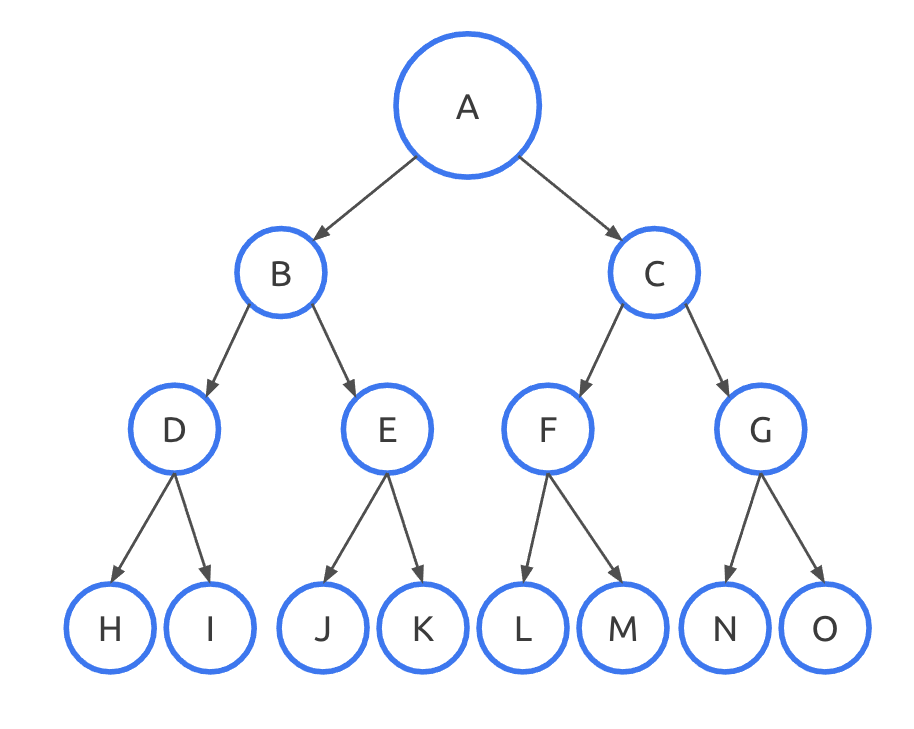

A depth-first search on this graph explores as far as possible along one pathway before backtracking. This means that it may traverse the graph in the following order, depending on your implementation:

$A \rightarrow B \rightarrow D \rightarrow H \rightarrow I \rightarrow E \rightarrow J \rightarrow K \rightarrow C \rightarrow F \rightarrow L \rightarrow M \rightarrow G \rightarrow N \rightarrow O$

Our search algorithm, in this example, is doing the following: 

1. Explore as far as possible in one direction until we can go further (as no additional connections exist that we haven't seen).
1. Backtrack one node from where we stopped and attempt to explore as far as possible in one direction again until we cannot.
1. Repeat this pattern of exploring and backtracking until we have found the node we're looking for or explored every node in the graph.

A key insight to keep in mind is that in order to avoid looping forever, you also need to keep track of which nodes you've already visited. Otherwise, if the graph contains a cycle, you may just keep traversing that cycle infinitely. 

### Implementation with recursion

As you might guess, given the emphasis on backtracking, depth-first search is typically implemented recursively. 

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Creates a representation of an edge between two nodes. Since this graph is
    # undirected, for nodes A and B, this method creates an A -> B edge and a
    # B -> A edge.
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def get_degree(self):
    # Returns the degree of the node (how many nodes are connected to this 
    # node.)
    return len(self.connected_to)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

In [ ]:
class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    # Adds a node to the graph.
    self.node_list.append(node)

  def remove_node(self, node):
    # Removes a node from the graph. Note that this method has to remove all
    # the node's edges, as well.
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    # Prints the graph.
    for node in self.node_list:
      print(node)

  def depth_first_search(self, node_name_to_find):
    if not self.node_list:
      return None
    # We choose an arbitrary node to start from.
    return self._dfs_helper(self.node_list[0], node_name_to_find, [])

  def _dfs_helper(self, start_node, node_name_to_find, visited_nodes):
    # Base case: If we've found the node, return it.
    if start_node.name == node_name_to_find:
      return start_node
    else:
      # Otherwise, mark the node as seen.
      visited_nodes.append(start_node)

      # Check the node's connections and if we haven't already seen it, call
      # _dfs_helper recursively on those nodes.
      for node in start_node.connected_to:
        if node in visited_nodes:
          continue
        else:
          if self._dfs_helper(node, node_name_to_find, visited_nodes):
            return node
    return None

With many recursive class methods, it's often best to define a helper method so that we can add addtional parameters, like the start node or the nodes that we've visited. Note that this implementation assumes that every node is reachable from the node that we started with. If that's not the case, then you would need to loop on `node in self.node_list` rather than just starting at `self.node_list[0]`. 

## Question 1

Which of the following statements about depth-first search are true?

**a)** Depth-first search uses recursion to visit nodes, so it runs in $O(\log{n})$ time where $n$ is the number of nodes in the graph.

**b)** Depth-first search needs to start at the node with the most connections in order to complete successfully.

**c)** A depth-first search from one node in the graph may not visit every other node in the graph, depending on how your graph is constructed.

**d)** Depth-first search needs to keep track of what nodes have already been seen, otherwise it may result in an infinite recursion.

### Solution

The correct answers are **c)** and **d)**.

**a)** While DFS does process nodes recursively, it still can potentially visit every node in the graph. As a result, it runs in linear time.

**b)** DFS traverses the graph and visits every node, so the start node is largely unimportant. If your graph is not fully connected, however, you need to make sure that you start a depth-first search from at least one node in each connected component.

## Question 2

Depth-first search may not always be the most efficient way to find a node.

Take, for instance, this graph:

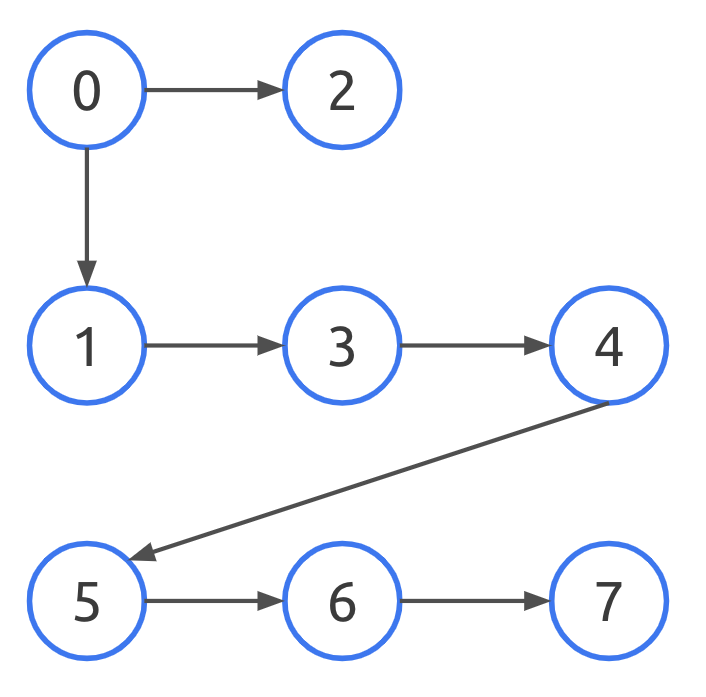

Let's see how long it takes to find the $2$ node. Make changes to `depth_first_search` and `_dfs_helper` such that a variable called `num_iterations` is returned that counts each iteration of your search. 

We'll return both the number of iterations and the found node as a tuple so that we can handle both. From the graph, you can see that $2$ is very close to our start node $0$, but by the nature of depth-first search, we don't see $2$ until we've seen all of $1$'s descendants. Understanding the graph that you're trying to search can often lead to better optimization.

To keep the code from crashing, we've added `num_iterations=0` as a default parameter, but make sure you pass `num_iterations` when making your calls!

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    if node not in self.connected_to:
      self.connected_to.append(node)

  def __str__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [node.name for node in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

In [ ]:
class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

  def depth_first_search(self, node_name_to_find):
    # TODO(you): Update this code to use the num_iterations parameter.
    if not self.node_list:
      return None
    return self._dfs_helper(self.node_list[0], node_name_to_find, [])

  def _dfs_helper(
      self, start_node, node_name_to_find, visited_nodes, num_iterations=0):
    # TODO(you): Update this code to use the num_iterations parameter.
    # Base case: If we've found the node, return it.
    if start_node.name == node_name_to_find:
      return start_node
    else:
      # Otherwise, mark the node as seen.
      visited_nodes.append(start_node)

      # Check the node's connections and if we haven't already seen it, call
      # _dfs_helper recursively on those nodes.
      for node in start_node.connected_to:
        if node in visited_nodes:
          continue
        else:
          if self._dfs_helper(node, node_name_to_find, visited_nodes):
            return node
    return None

### Hint

With most recursion, it's a good idea to think about all your base cases and what they should return.

*   If `node_list` is empty, what should `num_iterations` be?
*   When you successfully find the node, what should `num_iterations` be?
*   If you cannot find the node, how do you return `num_iterations`?

One other thing to keep in mind is that you'll likely want to return a tuple, so you can return both the node and the number of iterations. To do so, use the following code:

```python
found_node, num_iterations = function_that_returns_a_tuple(parameters)

def function_that_returns_a_tuple(parameters):
  found_node = some_variable
  num_interations = some_number
  
  return found_node, num_iterations
```



### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3), Node(4), Node(5), Node(6), 
             Node(7)]

graph = DirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[1])
node_list[0].add_connection(node_list[2])
node_list[1].add_connection(node_list[3])
node_list[3].add_connection(node_list[4])
node_list[4].add_connection(node_list[5])
node_list[5].add_connection(node_list[6])
node_list[6].add_connection(node_list[7])

print(graph.depth_first_search(2))
# Should print: (2: [], 8)

### Solution

This can be a bit tricky, since you're modifying existing recursive code. Stay consistent, and make sure you return `num_iterations` every time you have a `return` statement. Remember to pass `num_iterations` to `_dfs_helper` and to store both `found_node` and `num_iterations` as `_dfs_helper` returns. It can be a bit confusing to keep track of `num_iterations`, so make sure to check your work by hand on a smaller graph if you need to!

In [ ]:
class DirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def remove_node(self, node):
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    for node in self.node_list:
      print(node)

  def depth_first_search(self, node_name_to_find):
    if not self.node_list:
      return None, 0
    return self._dfs_helper(self.node_list[0], node_name_to_find, [], 0)

  def _dfs_helper(
      self, start_node, node_name_to_find, visited_nodes, num_iterations=0):
    num_iterations += 1
    # Base case: If we've found the node, return it.
    if start_node.name == node_name_to_find:
      return start_node, num_iterations
    # Otherwise, mark the node as seen.
    else:
      visited_nodes.append(start_node)

      # Check the node's connections and if we haven't already seen it, call
      # _dfs_helper recursively on those nodes.
      for node in start_node.connected_to:
        if node in visited_nodes:
          continue
        else:
          found_node, num_iterations = self._dfs_helper(
              node, node_name_to_find, visited_nodes, num_iterations)
          if found_node:
            return found_node, num_iterations
    return None, num_iterations

## Question 3

Your local newspaper has asked you to help them out. They've been working on managing their paper routes and are trying to build up an easy way to run analytics on the routes. But first, they need a simple way to count them! You quickly realize that you can represent paper routes as a graph, with edges connecting houses that the person delivering the newspaper can take. Note that some houses may have multiple edges; the paper delivery folks aren't necessarily very consistent from day-to-day. As a result, the graph is undirected.

Write a `count_paper_routes` method for the `LocalMap` class that returns the number of active paper routes in the map.

In [ ]:
class House:

  def __init__(self, number):
    self.number = number
    self.connected_to = []

  def add_connection(self, house):
    if house not in self.connected_to:
      self.connected_to.append(house)

  def __str__(self):
    return '%s: %s' % (
        self.number, [house.number for house in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (
        self.number, [house.number for house in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

In [ ]:
class LocalMap:

  def __init__(self):
    self.house_list = []

  def add_house(self, house):
    self.house_list.append(house)

  def print(self):
    for house in self.house_list:
      print(house)

  def count_paper_routes(self):
    # TODO(you): implement
    print('This method has not been implemented.')

  # You may want to use a helper method, similar to _dfs_helper.
  def _count_paper_routes_helper(self):
    pass

### Hint

You need to use depth-first search, but instead of looking for a node, you're trying to explore all the connections in one part of the graph. Such a group of connected nodes are commonly referred to as a **connected component**, and your algorithm should identify how many connected components exist in a graph (groups of nodes that are connected within their group but not connected to another group).

This particular solution can be tricky, because you need to keep track of two sets of nodes: the set of nodes you've seen in your current search, and the overall set of nodes you've seen in `count_paper_routes`. After a run of `_count_paper_routes_helper`, if there's any overlap between these two sets, you know that the group of nodes you have seen is already part of another connected component. To do this, create two sets, passing them both into your recursive helper. Update `current_route` as you go through your search and use `all_visited_houses` to see if you're on a route you've already traversed. Once you've completed the search, update `all_visited_houses` with `current_route` to make sure you don't search that route again in the future. It's complicated (as recursion often is), but it should give you the correct count of the paper routes in your town!

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
house_list = [House(0), House(1), House(2), House(3), House(4), House(5), 
              House(6), House(7), House(8), House(9), House(10)]

bridgeport = LocalMap()
for house in house_list:
  bridgeport.add_house(house)

house_list[0].add_connection(house_list[1])
house_list[1].add_connection(house_list[2])
house_list[2].add_connection(house_list[4])
house_list[3].add_connection(house_list[6])
house_list[4].add_connection(house_list[0])
house_list[5].add_connection(house_list[8])
house_list[5].add_connection(house_list[9])
house_list[6].add_connection(house_list[10])
house_list[7].add_connection(house_list[5])
house_list[8].add_connection(house_list[9])
house_list[10].add_connection(house_list[3])

print(bridgeport.count_paper_routes())
# Should print: 3

### Solution

In [ ]:
class LocalMap:

  def __init__(self):
    self.house_list = []

  def add_house(self, house):
    self.house_list.append(house)

  def print(self):
    for house in self.house_list:
      print(house)

  def count_paper_routes(self):
    all_visited_houses = set()
    total_routes = 0
    for house in self.house_list:
      is_new_route, current_route = self._count_paper_routes_helper(
          house, all_visited_houses, set())
      if is_new_route:
        total_routes += 1
      all_visited_houses = all_visited_houses.union(current_route)
    return total_routes

  def _count_paper_routes_helper(
      self, current_house, all_visited_houses, current_route):
    if current_house in all_visited_houses:
      return False, current_route
    if current_house in current_route:
      # We know this house isn't in all_visited houses, otherwise we should have
      # returned False.
      return True, current_route
    current_route.add(current_house)
    for next_house in current_house.connected_to:
      is_new_route, current_route = (
          self._count_paper_routes_helper(
              next_house, all_visited_houses, current_route)
      )
      if not is_new_route:
        return False, current_route
    return True, current_route

## Question 4

Your coworker has been working on a way to find the shortest path between two nodes on a graph for some time, but they're having some issues. Recall that for a graph, nodes can have weighted edges, with the weight of an edge representing the "distance" between two nodes. Your coworker has implemented an algorithm that calculates the shortest path between two nodes by using depth-first search to find all paths between the two nodes and adding each unique path (and its distance) to a priority queue (in which the total distance is the priority). Once that's completed, the algorithm returns the first element from the priority queue, which will be the shortest path.

Their implementation is below, but seems to contain some bugs. Can you identify the problems with it and correct it?

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node, distance):
    # Rather than implementing an Edge class, we can upgrade this Node class
    # to make this graph weighted by adding a distance variable to the internal
    # list of connections.
    if node not in self.connected_to:
      self.connected_to.append((node, distance))

  def __str__(self):
    return '%s: %s' % (self.name, [(
        connection[0].name, connection[1]) for connection in self.connected_to])

  def __repr__(self):
    return '%s: %s' % (self.name, [(
        connection[0].name, connection[1]) for connection in self.connected_to])

  def get_degree(self):
    return len(self.connected_to)

In [ ]:
class WeightedDirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def print(self):
    for node in self.node_list:
      print(node)

In [ ]:
from queue import PriorityQueue

def shortest_path(start_node, destination_node):
  paths = PriorityQueue()
  _shortest_path_helper(destination_node, (start_node, 0), [], 0, paths)
  shortest = paths.get()
  path = (shortest[0], [n.name for n in shortest[1]])
  print(path)

def _shortest_path_helper(
    destination_node, current_node, current_path, total_distance, path_queue):
  if current_node[0] == destination_node:
    # When we complete a path, we add it to our priority queue with its distance
    # as the priority.
    current_path.append(current_node[0])
    total_distance += current_node[1]
    path_queue.put((total_distance, current_path))
    return
  current_path.append(current_node[0])
  total_distance += current_node[1]
  for node_tuple in current_node[0].connected_to:
    # We need to make a copy of the current path so that subsequent edits to
    # it, recursively, don't mess up the paths we've stored in path_queue.
    next_path = current_path[:]
    _shortest_path_helper(
        destination_node, node_tuple, next_path, total_distance, path_queue)

### Hint

The code seems to be looping infinitely; what techniques does depth-first search typically use to avoid that?

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
import random

# DO NOT EDIT: used for debugging.
random.seed(3742)

node_list = [Node(0), Node(1), Node(2), Node(3), Node(4), Node(5), 
              Node(6), Node(7), Node(8), Node(9), Node(10)]

graph = WeightedDirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[3], random.randint(3, 7))
node_list[1].add_connection(node_list[2], random.randint(3, 7))
node_list[2].add_connection(node_list[3], random.randint(3, 7))
node_list[4].add_connection(node_list[1], random.randint(3, 7))
node_list[4].add_connection(node_list[7], random.randint(3, 7))
node_list[4].add_connection(node_list[9], random.randint(3, 7))
node_list[5].add_connection(node_list[0], random.randint(3, 7))
node_list[5].add_connection(node_list[3], random.randint(3, 7))
node_list[6].add_connection(node_list[3], random.randint(3, 7))
node_list[7].add_connection(node_list[8], random.randint(3, 7))
node_list[8].add_connection(node_list[4], random.randint(3, 7))
node_list[8].add_connection(node_list[5], random.randint(3, 7))
node_list[9].add_connection(node_list[6], random.randint(3, 7))
node_list[9].add_connection(node_list[8], random.randint(3, 7))
node_list[10].add_connection(node_list[3], random.randint(3, 7))
node_list[10].add_connection(node_list[9], random.randint(3, 7))

shortest_path(node_list[4], node_list[3])
# Should print: (14, [4, 9, 6, 3])

### Solution

The primary bug in this code is that it is not keeping track of nodes that you've already visited. The nice thing about a shortest path algorithm is that while you could add a `visited_nodes` array or set as we have done in depth-first search algorithms, you don't really need to. Instead, you can leverage `current_path`, since you're already tracking it! That way, you stop yourself from going through a node you've already seen, but you won't stop yourself from going to that node from a different branch of the recursion. To fix this, just return out of the path algorithm if you see a node that's already on the path you're taking.

Recursion can be a particularly tricky subject to debug, especially when it's a problem that only manifests after multiple calls of the function.

In [ ]:
from queue import PriorityQueue

def shortest_path(start_node, destination_node):
  paths = PriorityQueue()
  _shortest_path_helper(destination_node, (start_node, 0), [], 0, paths)
  shortest = paths.get()
  path = (shortest[0], [n.name for n in shortest[1]])
  print(path)

def _shortest_path_helper(
    destination_node, current_node, current_path, total_distance, path_queue):
  if current_node[0] == destination_node:
    # When we complete a path, we add it to our priority queue with its distance
    # as the priority.
    current_path.append(current_node[0])
    total_distance += current_node[1]
    path_queue.put((total_distance, current_path))
    return
  if current_node[0] in current_path:
    return
  current_path.append(current_node[0])
  total_distance += current_node[1]
  for node_tuple in current_node[0].connected_to:
    # We need to make a copy of the current path so that subsequent edits to
    # it, recursively, don't mess up the paths we've stored in path_queue.
    next_path = current_path[:]
    _shortest_path_helper(
        destination_node, node_tuple, next_path, total_distance, path_queue)